In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings.
%matplotlib inline

In [2]:
df = pd.read_csv('인구_교통_전기차_충전소_타입_앵커시설_fin.csv', encoding='utf-8')
df = df[['총 인구수', '총출근발생량', '전기차 수', '앵커시설', '충전소 개수', '완속']]
df.head()

,총 인구수,총출근발생량,전기차 수,앵커시설,충전소 개수,완속
0,62389,20592.0,919,2,250.0,380.0
1,493506,190060.0,5538,10,429.0,1856.0
2,293740,108701.0,3296,12,452.0,1897.0
3,284559,105587.0,3193,7,352.0,1708.0
4,84278,25846.0,1254,2,98.0,264.0


In [3]:
X = df[['총 인구수', '총출근발생량', '전기차 수', '앵커시설', '충전소 개수', '완속']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.41194268, -1.50052461, -1.27669997, -1.1776324 , -0.49953744,
        -0.99663911],
       [ 1.05413297,  0.8368398 ,  1.09534968,  0.77768177,  0.23833894,
         0.19282227],
       [-0.08856859, -0.28529318, -0.05601107,  1.26651032,  0.33314987,
         0.22586286],
       [-0.14108575, -0.3282426 , -0.10890588,  0.04443896, -0.07907157,
         0.07355378],
       [-1.28673322, -1.42805953, -1.10466347, -1.1776324 , -1.12611403,
        -1.09011981],
       [-0.17434872,  0.11170624, -0.45554661,  0.77768177, -0.61908166,
        -0.41641405],
       [ 0.47920706,  0.19115026,  0.22027443, -0.93321813,  0.20123901,
        -0.16740079],
       [-0.70441109, -0.62221305, -0.99784677, -0.44438958, -0.65618159,
        -0.54696469],
       [-0.28553225,  0.07043949, -0.5880404 , -0.44438958, -0.5737373 ,
        -0.58242288],
       [ 1.00976137,  0.48124506,  2.43107195,  1.02209605,  1.21942598,
         1.51766949],
       [ 2.14646244,  1.79083005,  2.23952086,  1.

k-distances 배열 값:
[ 57865.66721295  33622.5509294   26557.89895681  19082.76926968
  41865.72340233  32436.69354296  34394.13047309  41641.78449586
  27559.29491115  42360.51064376 203133.23406572  39684.48999294
  19512.31798121  52290.88863272  49588.49914043  37311.38525973
  16509.44565999  27621.87638449  49588.49914043  43434.67062152
  21054.04440957  33803.06029045  89344.38378544  59421.77494825
  42428.82055867  32403.28531183  38317.74271796  20641.80503251
  24148.22908621  46897.60574912  39339.3386828   80350.49811918
  20641.80503251  48783.58491337  47270.6005991   24148.22908621
  46897.60574912  33622.5509294   18838.19725982  49282.91535614
 107418.42804193  48217.03176265  47270.6005991  499619.60397787]


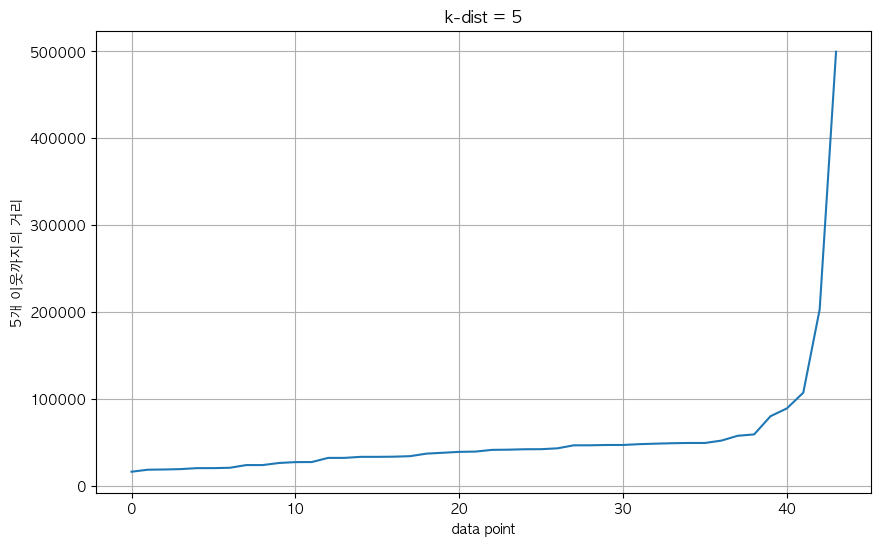

eps 값 : 203133.2340657235


In [4]:
# K-distances 그래프 -> eps 
k = 5

nn = NearestNeighbors(n_neighbors = k)
nn.fit(X)

distances, indices = nn.kneighbors(X)

# 데이터 포인트에서 k개 이웃까지 거리
k_distances = distances[:, -1]

print("k-distances 배열 값:")
print(k_distances)

plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize = (10, 6))
plt.plot(np.sort(k_distances))
plt.xlabel('data point')
plt.ylabel(f'{k}개 이웃까지의 거리')
plt.title(f'k-dist = {k}')
plt.grid(True)
plt.show()

sorted_distances = np.sort(k_distances)
differences = np.diff(sorted_distances) # diff : 인접한 요소들 간의 차이를 계산 
max_difference_index = np.argmax(differences) # k-dist 거리 배열에서 최대 차이가 나는 값 찾기
selected_eps = sorted_distances[max_difference_index]

print(f'eps 값 : {selected_eps}') # eps 값

# 거리가 1000000 ~ 5000000 사이 = 데이터 포인트들 사이의 거리가 매우 큼 -> DBSCAN 부적합

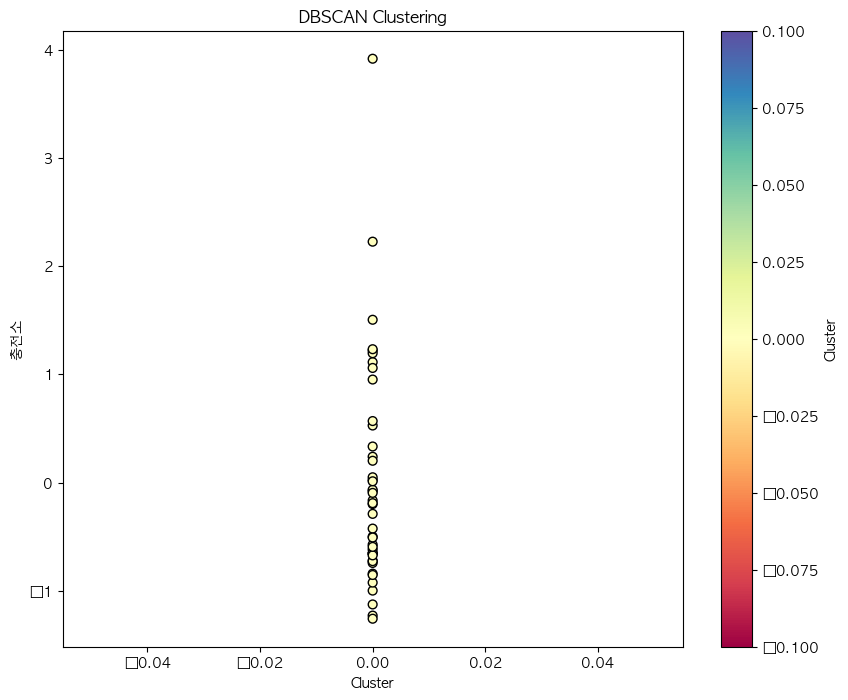

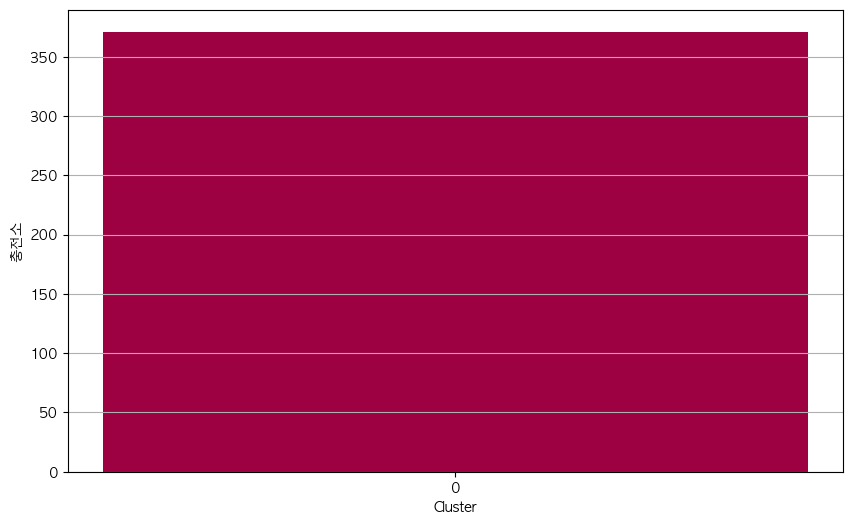

In [16]:
my_cluster = DBSCAN(eps = 203133.2340041875, min_samples = 5)
labels = my_cluster.fit_predict(X_scaled)

df['Cluster'] = labels

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

ax.scatter(labels, X_scaled[:, 4], c = labels, cmap = 'Spectral', s = 40, edgecolor = 'k')

ax.set_xlabel('Cluster')
ax.set_ylabel('충전소')
plt.colorbar(ax.collections[0], ax = ax, label = 'Cluster')
plt.title('DBSCAN Clustering')
plt.show()

cluster_means = df.groupby('Cluster')['충전소 개수'].mean()

plt.figure(figsize = (10, 6))

clusters = cluster_means.index # 클러스터 인덱스
values = cluster_means.values  # 클러스터별 평균 값

colors = plt.cm.Spectral(np.linspace(0, 1, len(clusters)))

bars = plt.bar(clusters, values, color = colors)

plt.xlabel('Cluster')
plt.ylabel('충전소')
plt.xticks(clusters)
plt.grid(axis = 'y')
plt.show()